In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(len(train_data))
print(len(test_data))
print(train_data[5]) #뉴스 기사의 단어를 인덱스로 매핑한 값들의 배열
print(train_labels[5]) #토픽의 인덱스로 0~45의 값

8982
2246
[1, 4, 37, 38, 309, 213, 349, 1632, 48, 193, 229, 463, 28, 156, 635, 11, 82, 14, 156, 635, 11, 82, 54, 139, 16, 349, 105, 462, 311, 28, 296, 147, 11, 82, 14, 296, 147, 11, 54, 139, 342, 48, 193, 3234, 361, 122, 23, 1332, 28, 318, 942, 11, 82, 14, 318, 942, 11, 82, 54, 139, 122, 7, 105, 462, 23, 349, 28, 296, 767, 11, 82, 14, 296, 767, 11, 54, 139, 342, 229, 162, 7, 48, 193, 55, 408, 28, 258, 557, 11, 82, 14, 196, 557, 11, 82, 54, 139, 162, 7, 105, 462, 55, 349, 28, 191, 968, 11, 82, 14, 191, 785, 11, 54, 139, 17, 12]
4


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
import numpy as np 

def vertorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
x_train = vertorize_sequence(train_data)
x_test = vertorize_sequence(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

#케라스 내장 함수를 사용해 one hot 인코딩
from  keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
print(x_train)
print(one_hot_train_labels)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 모델 구성

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
#훈련 검증
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 374us/step - loss: 2.6029 - accuracy: 0.5226 - val_loss: 1.7238 - val_accuracy: 0.6290
Epoch 2/20
7982/7982 [==============================] - 2s 212us/step - loss: 1.4312 - accuracy: 0.7053 - val_loss: 1.2996 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 2s 215us/step - loss: 1.0605 - accuracy: 0.7804 - val_loss: 1.1336 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 2s 215us/step - loss: 0.8237 - accuracy: 0.8336 - val_loss: 1.0212 - val_accuracy: 0.7980
Epoch 5/20
7982/7982 [==============================] - 2s 218us/step - loss: 0.6482 - accuracy: 0.8666 - val_loss: 0.9608 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 2s 219us/step - loss: 0.5165 - accuracy: 0.8914 - val_loss: 0.9145 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 2s 217us/step - loss

In [17]:
print(history.history)

{'val_loss': [1.723818500518799, 1.2996279439926148, 1.1336031589508058, 1.02124534034729, 0.9607801237106324, 0.9145405058860778, 0.9044360671043395, 0.8904106268882751, 0.9483226051330567, 0.8813473443984985, 0.9144928731918335, 0.9417246146202087, 0.966447723865509, 0.988542028427124, 0.9861238842010498, 1.0525251684188843, 1.0214148683547974, 1.0614385652542113, 1.0940986585617065, 1.1195100803375244], 'val_accuracy': [0.6290000081062317, 0.7200000286102295, 0.7599999904632568, 0.7979999780654907, 0.8050000071525574, 0.8080000281333923, 0.8130000233650208, 0.8149999976158142, 0.7990000247955322, 0.8240000009536743, 0.8149999976158142, 0.8140000104904175, 0.8050000071525574, 0.8100000023841858, 0.8059999942779541, 0.8019999861717224, 0.8059999942779541, 0.8019999861717224, 0.8019999861717224, 0.7960000038146973], 'loss': [2.602889843466168, 1.431220170251411, 1.060508716348358, 0.8236620846442249, 0.6482103870226249, 0.5165193474433142, 0.40710419293962546, 0.33836790701256336, 0.27

In [18]:
import matplotlib.pyplot as plt

def drawLossGraph(history_dict):
    
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss)+1)
    
    plt.clf()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()
    
def drawAccGraph(history_dict):
    
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc)+1)
    
    plt.clf()
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accurracy')
    plt.legend()
    
    plt.show()

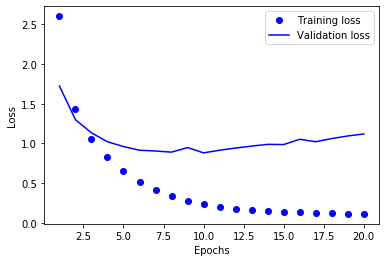

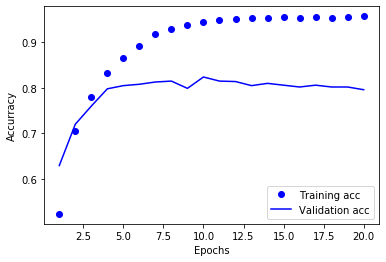

In [19]:
drawLossGraph(history.history)
drawAccGraph(history.history)

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 161us/step - loss: 2.6066 - accuracy: 0.5348 - val_loss: 1.7112 - val_accuracy: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 145us/step - loss: 1.3994 - accuracy: 0.7077 - val_loss: 1.2776 - val_accuracy: 0.7270
Epoch 3/9
7982/7982 [==============================] - 1s 146us/step - loss: 1.0398 - accuracy: 0.7830 - val_loss: 1.1365 - val_accuracy: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.8255 - accuracy: 0.8274 - val_loss: 1.0457 - val_accuracy: 0.7760
Epoch 5/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.6636 - accuracy: 0.8634 - val_loss: 0.9435 - val_accuracy: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.5333 - accuracy: 0.8889 - val_loss: 0.8998 - val_accuracy: 0.8160
Epoch 7/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.428

In [26]:
#예측하기
predictions = model.predict(x_test)
print(predictions[0]) #예측값은 46개의 라벨에 대한 확률값으로 나타내어 진다.
print(np,sum(predictions[0])) #확률값의 합은 1
print(np.argmax(predictions[0])) #argmax값이 확률이 제일 높은 라벨값

[2.69879703e-03 1.05100323e-03 3.95624695e-04 4.30508405e-01
 3.60021710e-01 1.63648481e-04 1.10668223e-03 7.33552093e-04
 9.57086310e-02 2.03365134e-03 2.40661856e-03 1.03426566e-02
 9.53592709e-04 1.96926831e-03 5.86760987e-04 5.48417796e-04
 7.29866605e-03 2.73863156e-03 2.31663161e-03 1.69318672e-02
 1.96077079e-02 3.49105266e-03 3.33058386e-04 3.44207883e-03
 1.06807658e-03 1.45118230e-03 1.50717577e-04 1.01073085e-04
 1.97933032e-03 2.62136012e-03 2.96775531e-03 5.15384786e-03
 9.92955058e-04 5.30874066e-04 2.18876987e-03 6.02620770e-04
 1.75874867e-03 2.74904858e-04 1.23993086e-03 6.30949065e-03
 6.33053540e-04 1.04840437e-03 7.61465562e-05 1.30606524e-03
 8.43902308e-05 7.15985880e-05]
<module 'numpy' from 'C:\\Users\\opp06\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'> 1.0000000111176632
3


In [28]:
#정수 레이블을 사용하고 싶을 때의 모델 학습법
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy', #손실 함수를 변경해준다
             metrics=['accuracy'])

## 추가실험

### 32 은닉층

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 161us/step - loss: 2.8883 - accuracy: 0.4664 - val_loss: 2.1234 - val_accuracy: 0.5830
Epoch 2/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.7801 - accuracy: 0.6403 - val_loss: 1.6085 - val_accuracy: 0.6540
Epoch 3/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.3724 - accuracy: 0.7076 - val_loss: 1.3694 - val_accuracy: 0.6980
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.1384 - accuracy: 0.7420 - val_loss: 1.2321 - val_accuracy: 0.7220
Epoch 5/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.9730 - accuracy: 0.7772 - val_loss: 1.1464 - val_accuracy: 0.7350
Epoch 6/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.8404 - accuracy: 0.8103 - val_loss: 1.0769 - val_accuracy: 0.7520
Epoch 7/20
7982/7982 [==============================] - 1s 139us/step - loss

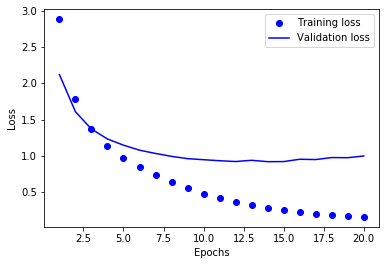

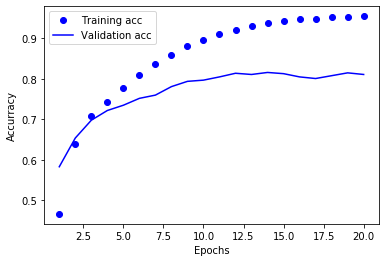

In [32]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

drawLossGraph(history.history)
drawAccGraph(history.history)

### 128은닉층

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 159us/step - loss: 2.2588 - accuracy: 0.5584 - val_loss: 1.3753 - val_accuracy: 0.6880
Epoch 2/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.0948 - accuracy: 0.7612 - val_loss: 1.1117 - val_accuracy: 0.7510
Epoch 3/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.7762 - accuracy: 0.8335 - val_loss: 0.9834 - val_accuracy: 0.7820
Epoch 4/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.5618 - accuracy: 0.8859 - val_loss: 0.8997 - val_accuracy: 0.8150
Epoch 5/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.4183 - accuracy: 0.9161 - val_loss: 0.8658 - val_accuracy: 0.8280
Epoch 6/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.3139 - accuracy: 0.9344 - val_loss: 0.8626 - val_accuracy: 0.8190
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss

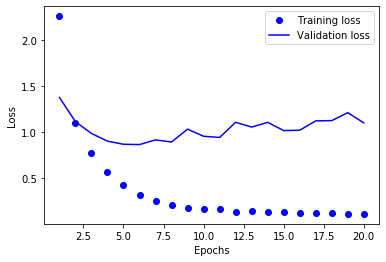

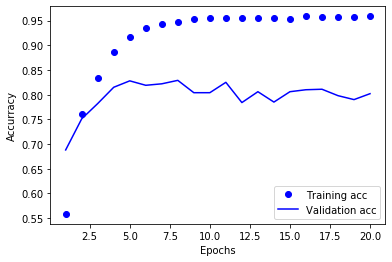

In [33]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

drawLossGraph(history.history)
drawAccGraph(history.history)

### 은닉층 1개

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 168us/step - loss: 2.6291 - accuracy: 0.5799 - val_loss: 1.8363 - val_accuracy: 0.6640
Epoch 2/20
7982/7982 [==============================] - 1s 145us/step - loss: 1.5007 - accuracy: 0.7235 - val_loss: 1.3580 - val_accuracy: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.0875 - accuracy: 0.7889 - val_loss: 1.1277 - val_accuracy: 0.7760
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8435 - accuracy: 0.8334 - val_loss: 1.0036 - val_accuracy: 0.7990
Epoch 5/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.6765 - accuracy: 0.8688 - val_loss: 0.9250 - val_accuracy: 0.8080
Epoch 6/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.5486 - accuracy: 0.8915 - val_loss: 0.8762 - val_accuracy: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 151us/step - loss

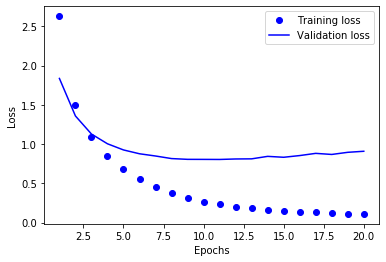

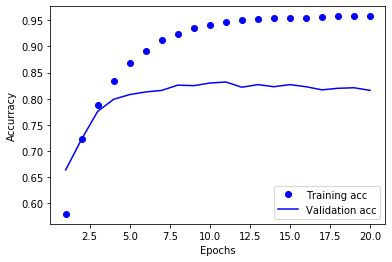

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

drawLossGraph(history.history)
drawAccGraph(history.history)

### 은닉층 3개

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 182us/step - loss: 2.5899 - accuracy: 0.4261 - val_loss: 1.7376 - val_accuracy: 0.6000
Epoch 2/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.4753 - accuracy: 0.6845 - val_loss: 1.3592 - val_accuracy: 0.7010
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.1289 - accuracy: 0.7456 - val_loss: 1.1933 - val_accuracy: 0.7350
Epoch 4/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.8956 - accuracy: 0.8062 - val_loss: 1.1190 - val_accuracy: 0.7480
Epoch 5/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.7130 - accuracy: 0.8409 - val_loss: 1.1095 - val_accuracy: 0.7460
Epoch 6/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.5694 - accuracy: 0.8696 - val_loss: 1.0125 - val_accuracy: 0.7840
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss

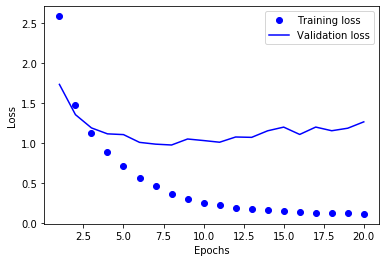

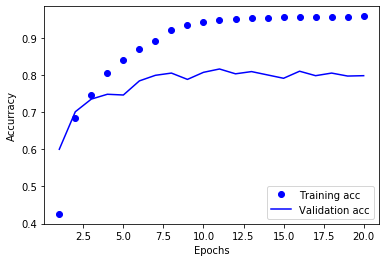

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

drawLossGraph(history.history)
drawAccGraph(history.history)

### 128 은닉층 3개

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 188us/step - loss: 2.1598 - accuracy: 0.5395 - val_loss: 1.4165 - val_accuracy: 0.6710
Epoch 2/20
7982/7982 [==============================] - 1s 156us/step - loss: 1.1768 - accuracy: 0.7238 - val_loss: 1.1374 - val_accuracy: 0.7440
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.8490 - accuracy: 0.8076 - val_loss: 1.0392 - val_accuracy: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.6103 - accuracy: 0.8638 - val_loss: 0.9391 - val_accuracy: 0.8060
Epoch 5/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.4403 - accuracy: 0.9064 - val_loss: 1.0585 - val_accuracy: 0.7720
Epoch 6/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.3452 - accuracy: 0.9240 - val_loss: 0.9270 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 159us/step - loss

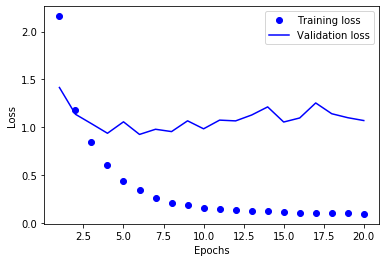

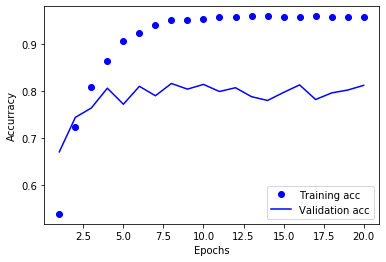

In [36]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

drawLossGraph(history.history)
drawAccGraph(history.history)